In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers as tf_layers

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import time
from PIL import Image

# Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Supposed to be commented out; uncomment only for testing
# train_size = 1000
# test_size = 100
# train_images, train_labels = train_images[:train_size], train_labels[:train_size]
# test_images, test_labels = test_images[:test_size], test_labels[:test_size]

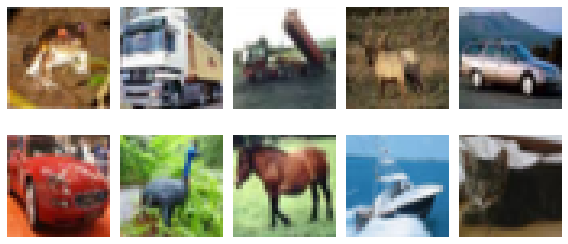

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('./plots/sample_images.jpg')
plt.show()

In [4]:
train_labels_one_hot = tf.one_hot(train_labels[:, 0], 10)
test_labels_one_hot = tf.one_hot(test_labels[:, 0], 10)

train_labels_one_hot[10].numpy()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Architecture

## Model 1

In [5]:
model_1 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    tf_layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.MaxPooling2D(pool_size=(8, 8)),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_1')

## Raw predictions

In [6]:
model_1.predict(train_images[:4])

array([[0.3102289 , 0.04388418, 0.09348349, 0.11833623, 0.03337299,
        0.05916024, 0.05914203, 0.04586514, 0.13769099, 0.09883579],
       [0.30853188, 0.04353305, 0.09168533, 0.12048813, 0.03336096,
        0.05900173, 0.05981053, 0.04543867, 0.13932769, 0.098822  ],
       [0.31115592, 0.04354907, 0.09296943, 0.11759286, 0.03347881,
        0.05971997, 0.05897107, 0.04638271, 0.13820602, 0.09797422],
       [0.30740398, 0.04365538, 0.09245769, 0.11884824, 0.03357116,
        0.05998491, 0.0596593 , 0.0460469 , 0.13896216, 0.09941032]],
      dtype=float32)

## Weights count

In [7]:
model_1.build((1, 32, 32, 3))
model_1.count_params()

1180

## Optimization

In [8]:
BATCH_SIZE = 64
EPOCHS = 150

def compile_and_fit(model, epochs=None):
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    if epochs is None:
        epochs = EPOCHS
    start = time.time()
    model_history = model.fit(train_images, 
                              train_labels_one_hot, 
                              batch_size=BATCH_SIZE, 
                              epochs=epochs, 
                              validation_data=(test_images, test_labels_one_hot))
    end = time.time()
    return model_history, end - start

In [9]:
model_1_history, model_1_elapsed_time = compile_and_fit(model_1)

Epoch 1/150
782/782 [==============================] - 5s 5ms/step - loss: 0.3694 - categorical_accuracy: 0.1016 - val_loss: 0.3255 - val_categorical_accuracy: 0.1047
Epoch 2/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3252 - categorical_accuracy: 0.1006 - val_loss: 0.3252 - val_categorical_accuracy: 0.0903
Epoch 3/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3252 - categorical_accuracy: 0.0883 - val_loss: 0.3252 - val_categorical_accuracy: 0.0873
Epoch 4/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3252 - categorical_accuracy: 0.0864 - val_loss: 0.3252 - val_categorical_accuracy: 0.0943
Epoch 5/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3251 - categorical_accuracy: 0.0934 - val_loss: 0.3251 - val_categorical_accuracy: 0.0913
Epoch 6/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3251 - categorical_accuracy: 0.0958 - val_loss: 0.3251 - val_categorical_accuracy: 0.083

Epoch 50/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3249 - categorical_accuracy: 0.1275 - val_loss: 0.3249 - val_categorical_accuracy: 0.1458
Epoch 51/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3249 - categorical_accuracy: 0.1313 - val_loss: 0.3249 - val_categorical_accuracy: 0.1027
Epoch 52/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3249 - categorical_accuracy: 0.1364 - val_loss: 0.3249 - val_categorical_accuracy: 0.1402
Epoch 53/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3249 - categorical_accuracy: 0.1333 - val_loss: 0.3249 - val_categorical_accuracy: 0.1488
Epoch 54/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3249 - categorical_accuracy: 0.1346 - val_loss: 0.3249 - val_categorical_accuracy: 0.1370
Epoch 55/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3249 - categorical_accuracy: 0.1286 - val_loss: 0.3249 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3238 - categorical_accuracy: 0.1797 - val_loss: 0.3238 - val_categorical_accuracy: 0.1682
Epoch 100/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3238 - categorical_accuracy: 0.1714 - val_loss: 0.3237 - val_categorical_accuracy: 0.1759
Epoch 101/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3237 - categorical_accuracy: 0.1744 - val_loss: 0.3237 - val_categorical_accuracy: 0.1662
Epoch 102/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3236 - categorical_accuracy: 0.1751 - val_loss: 0.3236 - val_categorical_accuracy: 0.1739
Epoch 103/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3236 - categorical_accuracy: 0.1765 - val_loss: 0.3235 - val_categorical_accuracy: 0.1749
Epoch 104/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3235 - categorical_accuracy: 0.1794 - val_loss: 0.3235 - val_categorical_accu

782/782 [==============================] - 4s 5ms/step - loss: 0.3123 - categorical_accuracy: 0.2316 - val_loss: 0.3119 - val_categorical_accuracy: 0.2350
Epoch 148/150
782/782 [==============================] - 5s 7ms/step - loss: 0.3118 - categorical_accuracy: 0.2342 - val_loss: 0.3113 - val_categorical_accuracy: 0.2387
Epoch 149/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3113 - categorical_accuracy: 0.2367 - val_loss: 0.3108 - val_categorical_accuracy: 0.2385
Epoch 150/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3108 - categorical_accuracy: 0.2392 - val_loss: 0.3103 - val_categorical_accuracy: 0.2402


In [10]:
print(f'Elapsed time: {model_1_elapsed_time:.2f} s')
model_1_history.history.keys()

Elapsed time: 519.15 s


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

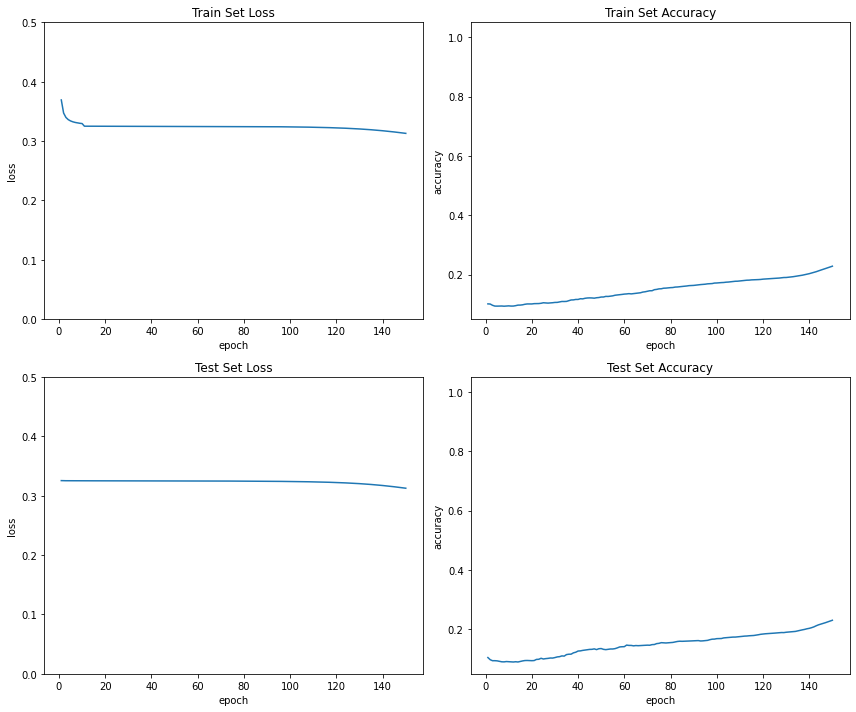

In [11]:
def _moving_average(arr, n):
    cumsum = np.cumsum(np.concatenate(([0] * n, arr)))
    return (cumsum[n:] - cumsum[:-n]) / np.concatenate((np.arange(1, n + 1), np.full((len(arr) - n,), n)))

def _plot_score_vs_epochs(sub_idx, x, y, xlabel, ylabel, title=None, y_min=None, y_max=None, ma=10):
    y = _moving_average(y, ma)
    plt.subplot(2, 2, sub_idx)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    
def plot_all_score_vs_epochs(model_history, model_name, epochs=None, ma=10):
    plt.rcParams['figure.figsize'] = [12, 10]
    
    if epochs is None:
        epochs = EPOCHS
    x = np.arange(1, epochs + 1)  
    
    _plot_score_vs_epochs(1, x, model_history.history['loss'], 'epoch', 'loss',
                          title='Train Set Loss',     y_min=0.00, y_max=0.50, ma=ma)
    _plot_score_vs_epochs(2, x, model_history.history['categorical_accuracy'], 'epoch', 'accuracy',
                          title='Train Set Accuracy', y_min=0.05, y_max=1.05, ma=ma)
    _plot_score_vs_epochs(3, x, model_history.history['val_loss'], 'epoch', 'loss',
                          title='Test Set Loss',      y_min=0.00, y_max=0.50, ma=ma)
    _plot_score_vs_epochs(4, x, model_history.history['val_categorical_accuracy'], 'epoch', 'accuracy',
                          title='Test Set Accuracy',  y_min=0.05, y_max=1.05, ma=ma)
    plt.tight_layout()
    plt.savefig(f'plots/{model_name}_plots.jpg')
    plt.show()
    
plot_all_score_vs_epochs(model_1_history, 'model_1')

## Predictions

In [12]:
model_1.predict(train_images[:4])

array([[0.05717432, 0.09631193, 0.11389667, 0.11844998, 0.11513492,
        0.13393289, 0.13051663, 0.11456116, 0.04523803, 0.07478351],
       [0.1074824 , 0.10995417, 0.09653888, 0.09095121, 0.09019178,
        0.10037262, 0.07718984, 0.09804198, 0.1282982 , 0.10097889],
       [0.12014523, 0.10637303, 0.08486287, 0.06933571, 0.08088865,
        0.07405891, 0.07476541, 0.09813993, 0.14661409, 0.14481618],
       [0.04257524, 0.09920246, 0.11082224, 0.12610525, 0.11447749,
        0.13070455, 0.14630178, 0.11174227, 0.03699419, 0.08107454]],
      dtype=float32)

# Evolution

## Model 2
- Increased the convolution filters number from 5 to 20

In [13]:
model_2 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    tf_layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.MaxPooling2D(pool_size=(8, 8)),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_2')

model_2_history, model_2_elapsed_time = compile_and_fit(model_2)

Epoch 1/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3436 - categorical_accuracy: 0.0927 - val_loss: 0.3253 - val_categorical_accuracy: 0.0999
Epoch 2/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3253 - categorical_accuracy: 0.0924 - val_loss: 0.3253 - val_categorical_accuracy: 0.0980
Epoch 3/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3253 - categorical_accuracy: 0.0901 - val_loss: 0.3252 - val_categorical_accuracy: 0.0871
Epoch 4/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3252 - categorical_accuracy: 0.0883 - val_loss: 0.3252 - val_categorical_accuracy: 0.0990
Epoch 5/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3252 - categorical_accuracy: 0.0964 - val_loss: 0.3252 - val_categorical_accuracy: 0.1004
Epoch 6/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3252 - categorical_accuracy: 0.0984 - val_loss: 0.3251 - val_categorical_accuracy: 0.113

Epoch 50/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3233 - categorical_accuracy: 0.1861 - val_loss: 0.3232 - val_categorical_accuracy: 0.1901
Epoch 51/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3231 - categorical_accuracy: 0.1875 - val_loss: 0.3230 - val_categorical_accuracy: 0.2093
Epoch 52/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3230 - categorical_accuracy: 0.1945 - val_loss: 0.3229 - val_categorical_accuracy: 0.2205
Epoch 53/150
782/782 [==============================] - 3s 4ms/step - loss: 0.3229 - categorical_accuracy: 0.1983 - val_loss: 0.3228 - val_categorical_accuracy: 0.1950
Epoch 54/150
782/782 [==============================] - 4s 5ms/step - loss: 0.3227 - categorical_accuracy: 0.1960 - val_loss: 0.3226 - val_categorical_accuracy: 0.2088
Epoch 55/150
782/782 [==============================] - 4s 6ms/step - loss: 0.3226 - categorical_accuracy: 0.2022 - val_loss: 0.3224 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 4s 5ms/step - loss: 0.2994 - categorical_accuracy: 0.2777 - val_loss: 0.2984 - val_categorical_accuracy: 0.2850
Epoch 100/150
782/782 [==============================] - 4s 5ms/step - loss: 0.2989 - categorical_accuracy: 0.2794 - val_loss: 0.2979 - val_categorical_accuracy: 0.2856
Epoch 101/150
782/782 [==============================] - 3s 4ms/step - loss: 0.2984 - categorical_accuracy: 0.2798 - val_loss: 0.2973 - val_categorical_accuracy: 0.2907
Epoch 102/150
782/782 [==============================] - 4s 4ms/step - loss: 0.2979 - categorical_accuracy: 0.2811 - val_loss: 0.2968 - val_categorical_accuracy: 0.2912
Epoch 103/150
782/782 [==============================] - 3s 4ms/step - loss: 0.2974 - categorical_accuracy: 0.2845 - val_loss: 0.2963 - val_categorical_accuracy: 0.2888
Epoch 104/150
782/782 [==============================] - 3s 4ms/step - loss: 0.2970 - categorical_accuracy: 0.2841 - val_loss: 0.2959 - val_categorical_accu

782/782 [==============================] - 4s 4ms/step - loss: 0.2829 - categorical_accuracy: 0.3247 - val_loss: 0.2817 - val_categorical_accuracy: 0.3336
Epoch 148/150
782/782 [==============================] - 4s 5ms/step - loss: 0.2827 - categorical_accuracy: 0.3249 - val_loss: 0.2815 - val_categorical_accuracy: 0.3332
Epoch 149/150
782/782 [==============================] - 4s 5ms/step - loss: 0.2825 - categorical_accuracy: 0.3265 - val_loss: 0.2812 - val_categorical_accuracy: 0.3335
Epoch 150/150
782/782 [==============================] - 4s 5ms/step - loss: 0.2822 - categorical_accuracy: 0.3281 - val_loss: 0.2810 - val_categorical_accuracy: 0.3343


In [14]:
model_2.count_params()

7390

Elapsed time: 576.60 s


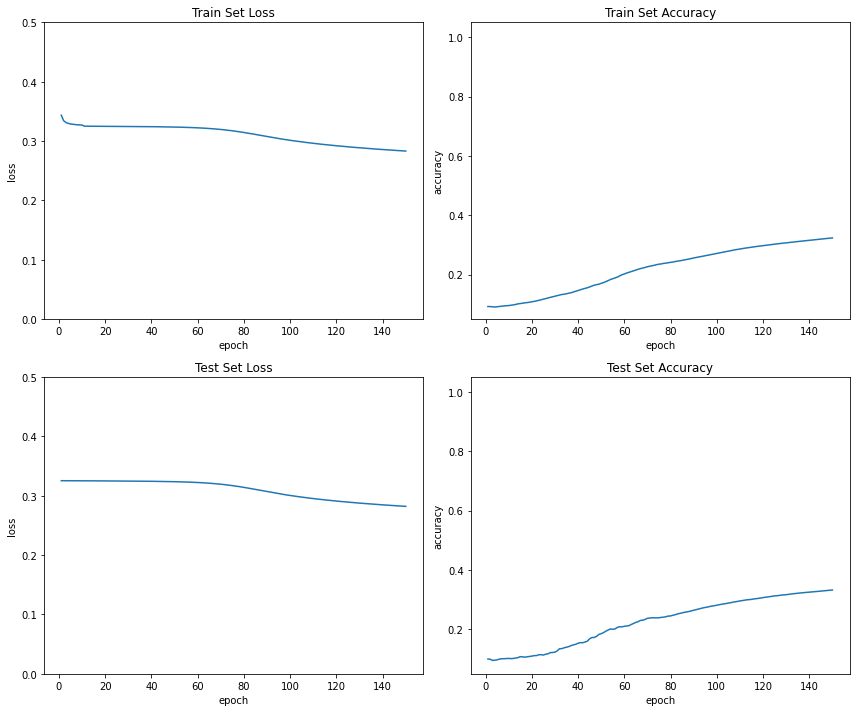

In [15]:
print(f'Elapsed time: {(model_2_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_2_history, 'model_2', ma=10)

## Model 3.1
- two convolution blocks (20, 40) instead of one (20)

In [16]:
def convolution_block(n_filters, activation='relu'):
    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.MaxPooling2D(pool_size=(2, 2))]

In [17]:
model_3_1 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20, 'sigmoid'),
    *convolution_block(40, 'sigmoid'),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_3_1')

model_3_1_history, model_3_1_elapsed_time = compile_and_fit(model_3_1, epochs=15)

Epoch 1/15
782/782 [==============================] - 5s 7ms/step - loss: 0.3306 - categorical_accuracy: 0.0999 - val_loss: 0.3254 - val_categorical_accuracy: 0.1000
Epoch 2/15
782/782 [==============================] - 5s 6ms/step - loss: 0.3254 - categorical_accuracy: 0.0989 - val_loss: 0.3252 - val_categorical_accuracy: 0.1000
Epoch 3/15
782/782 [==============================] - 5s 6ms/step - loss: 0.3254 - categorical_accuracy: 0.0979 - val_loss: 0.3253 - val_categorical_accuracy: 0.1000
Epoch 4/15
782/782 [==============================] - 5s 6ms/step - loss: 0.3254 - categorical_accuracy: 0.0994 - val_loss: 0.3253 - val_categorical_accuracy: 0.1000
Epoch 5/15
782/782 [==============================] - 5s 6ms/step - loss: 0.3253 - categorical_accuracy: 0.0986 - val_loss: 0.3253 - val_categorical_accuracy: 0.1000
Epoch 6/15
782/782 [==============================] - 5s 7ms/step - loss: 0.3254 - categorical_accuracy: 0.0979 - val_loss: 0.3252 - val_categorical_accuracy: 0.1000
Epoc

Elapsed time: 73.30 s


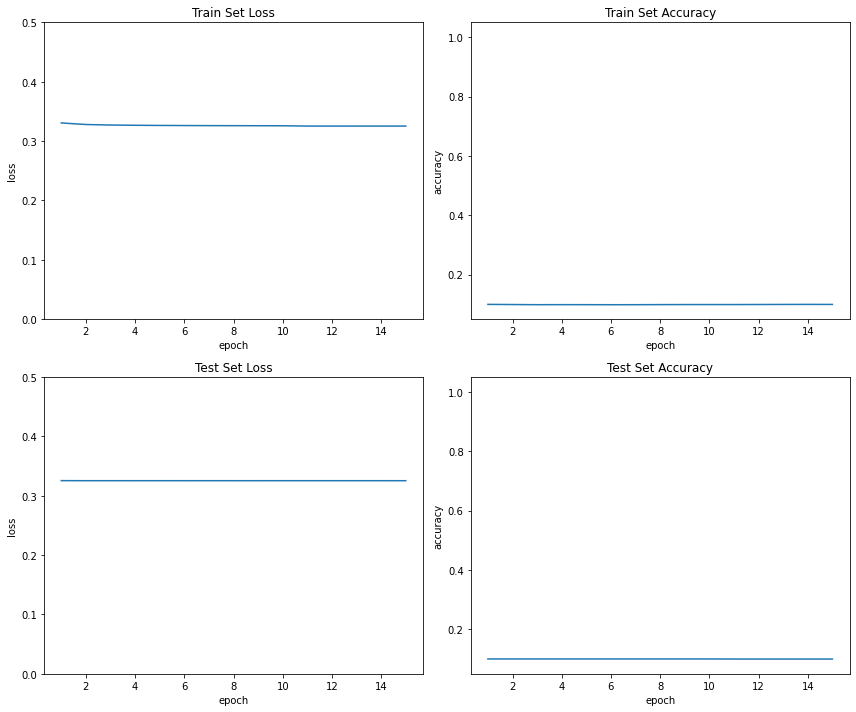

In [18]:
print(f'Elapsed time: {(model_3_1_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_1_history, 'model_3_1', epochs=15)

# Model 3.2
- ReLU instead of sigmoid in Conv2D

In [19]:
model_3_2 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20),
    *convolution_block(40),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='sigmoid')
], name='model_3_2')

model_3_2_history, model_3_2_elapsed_time = compile_and_fit(model_3_2)

Epoch 1/150
782/782 [==============================] - 5s 6ms/step - loss: 0.3485 - categorical_accuracy: 0.1438 - val_loss: 0.3237 - val_categorical_accuracy: 0.1885
Epoch 2/150
782/782 [==============================] - 4s 6ms/step - loss: 0.3202 - categorical_accuracy: 0.1883 - val_loss: 0.3171 - val_categorical_accuracy: 0.2144
Epoch 3/150
782/782 [==============================] - 5s 6ms/step - loss: 0.3124 - categorical_accuracy: 0.2278 - val_loss: 0.3070 - val_categorical_accuracy: 0.2517
Epoch 4/150
782/782 [==============================] - 4s 6ms/step - loss: 0.3004 - categorical_accuracy: 0.2757 - val_loss: 0.2955 - val_categorical_accuracy: 0.2947
Epoch 5/150
782/782 [==============================] - 4s 6ms/step - loss: 0.2936 - categorical_accuracy: 0.3000 - val_loss: 0.2906 - val_categorical_accuracy: 0.3137
Epoch 6/150
782/782 [==============================] - 4s 6ms/step - loss: 0.2891 - categorical_accuracy: 0.3163 - val_loss: 0.2864 - val_categorical_accuracy: 0.328

Epoch 50/150
782/782 [==============================] - 5s 6ms/step - loss: 0.2086 - categorical_accuracy: 0.5562 - val_loss: 0.2105 - val_categorical_accuracy: 0.5503
Epoch 51/150
782/782 [==============================] - 5s 6ms/step - loss: 0.2076 - categorical_accuracy: 0.5589 - val_loss: 0.2088 - val_categorical_accuracy: 0.5572
Epoch 52/150
782/782 [==============================] - 4s 6ms/step - loss: 0.2065 - categorical_accuracy: 0.5621 - val_loss: 0.2100 - val_categorical_accuracy: 0.5503
Epoch 53/150
782/782 [==============================] - 5s 6ms/step - loss: 0.2056 - categorical_accuracy: 0.5643 - val_loss: 0.2077 - val_categorical_accuracy: 0.5564
Epoch 54/150
782/782 [==============================] - 5s 6ms/step - loss: 0.2047 - categorical_accuracy: 0.5648 - val_loss: 0.2074 - val_categorical_accuracy: 0.5606
Epoch 55/150
782/782 [==============================] - 5s 6ms/step - loss: 0.2037 - categorical_accuracy: 0.5684 - val_loss: 0.2065 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 5s 7ms/step - loss: 0.1714 - categorical_accuracy: 0.6575 - val_loss: 0.1834 - val_categorical_accuracy: 0.6280
Epoch 100/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1708 - categorical_accuracy: 0.6592 - val_loss: 0.1825 - val_categorical_accuracy: 0.6293
Epoch 101/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1703 - categorical_accuracy: 0.6627 - val_loss: 0.1798 - val_categorical_accuracy: 0.6420
Epoch 102/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1699 - categorical_accuracy: 0.6628 - val_loss: 0.1826 - val_categorical_accuracy: 0.6315
Epoch 103/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1694 - categorical_accuracy: 0.6634 - val_loss: 0.1798 - val_categorical_accuracy: 0.6401
Epoch 104/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1687 - categorical_accuracy: 0.6659 - val_loss: 0.1804 - val_categorical_accu

782/782 [==============================] - 5s 6ms/step - loss: 0.1508 - categorical_accuracy: 0.7147 - val_loss: 0.1695 - val_categorical_accuracy: 0.6723
Epoch 148/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1505 - categorical_accuracy: 0.7144 - val_loss: 0.1710 - val_categorical_accuracy: 0.6651
Epoch 149/150
782/782 [==============================] - 5s 6ms/step - loss: 0.1501 - categorical_accuracy: 0.7168 - val_loss: 0.1713 - val_categorical_accuracy: 0.6698
Epoch 150/150
782/782 [==============================] - 4s 6ms/step - loss: 0.1500 - categorical_accuracy: 0.7150 - val_loss: 0.1694 - val_categorical_accuracy: 0.6731


Elapsed time: 696.07 s


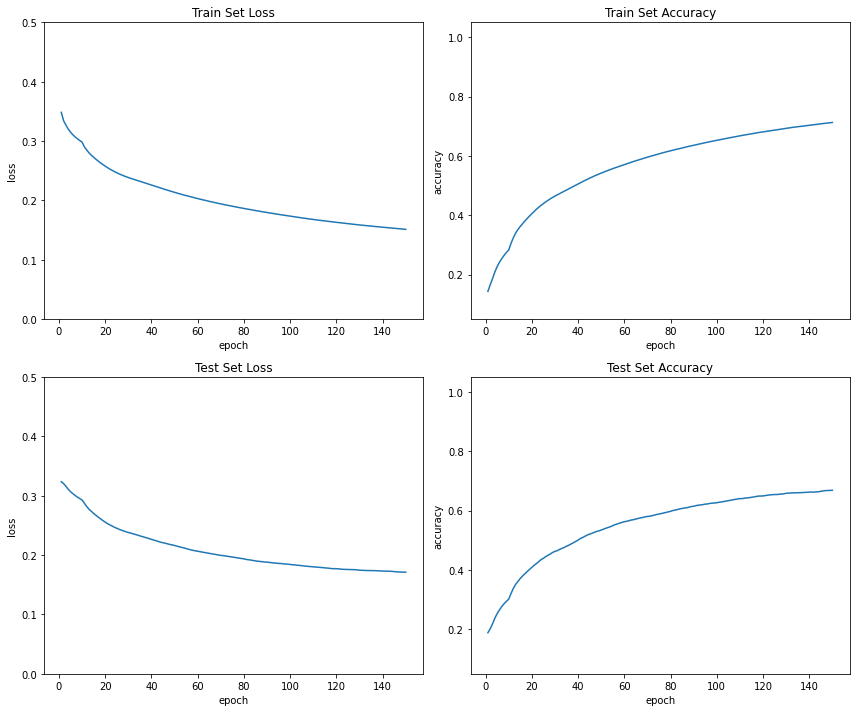

In [20]:
print(f'Elapsed time: {(model_3_2_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_2_history, 'model_3_2')

## Model 3.3
- two next blocks: (20, 40, 80, 160)

In [21]:
model_3_3 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20),
    *convolution_block(40),
    *convolution_block(80),
    *convolution_block(160),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_3_3')

model_3_3_history, model_3_3_elapsed_time = compile_and_fit(model_3_3)

Epoch 1/150
782/782 [==============================] - 7s 8ms/step - loss: 0.3811 - categorical_accuracy: 0.1313 - val_loss: 0.3265 - val_categorical_accuracy: 0.1715
Epoch 2/150
782/782 [==============================] - 6s 8ms/step - loss: 0.3242 - categorical_accuracy: 0.1712 - val_loss: 0.3217 - val_categorical_accuracy: 0.1774
Epoch 3/150
782/782 [==============================] - 6s 8ms/step - loss: 0.3193 - categorical_accuracy: 0.1818 - val_loss: 0.3169 - val_categorical_accuracy: 0.1937
Epoch 4/150
782/782 [==============================] - 7s 8ms/step - loss: 0.3157 - categorical_accuracy: 0.1926 - val_loss: 0.3139 - val_categorical_accuracy: 0.2167
Epoch 5/150
782/782 [==============================] - 7s 9ms/step - loss: 0.3133 - categorical_accuracy: 0.2059 - val_loss: 0.3127 - val_categorical_accuracy: 0.2018
Epoch 6/150
782/782 [==============================] - 7s 9ms/step - loss: 0.3107 - categorical_accuracy: 0.2190 - val_loss: 0.3088 - val_categorical_accuracy: 0.235

Epoch 50/150
782/782 [==============================] - 6s 8ms/step - loss: 0.1862 - categorical_accuracy: 0.6070 - val_loss: 0.2139 - val_categorical_accuracy: 0.5366
Epoch 51/150
782/782 [==============================] - 6s 8ms/step - loss: 0.1848 - categorical_accuracy: 0.6107 - val_loss: 0.2165 - val_categorical_accuracy: 0.5308
Epoch 52/150
782/782 [==============================] - 7s 8ms/step - loss: 0.1834 - categorical_accuracy: 0.6144 - val_loss: 0.2130 - val_categorical_accuracy: 0.5378
Epoch 53/150
782/782 [==============================] - 6s 8ms/step - loss: 0.1819 - categorical_accuracy: 0.6214 - val_loss: 0.2139 - val_categorical_accuracy: 0.5416
Epoch 54/150
782/782 [==============================] - 7s 9ms/step - loss: 0.1802 - categorical_accuracy: 0.6248 - val_loss: 0.2188 - val_categorical_accuracy: 0.5308
Epoch 55/150
782/782 [==============================] - 7s 8ms/step - loss: 0.1780 - categorical_accuracy: 0.6311 - val_loss: 0.2155 - val_categorical_accuracy:

Epoch 99/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0939 - categorical_accuracy: 0.8508 - val_loss: 0.2910 - val_categorical_accuracy: 0.5474
Epoch 100/150
782/782 [==============================] - 7s 8ms/step - loss: 0.0912 - categorical_accuracy: 0.8551 - val_loss: 0.2951 - val_categorical_accuracy: 0.5409
Epoch 101/150
782/782 [==============================] - 7s 8ms/step - loss: 0.0879 - categorical_accuracy: 0.8642 - val_loss: 0.3076 - val_categorical_accuracy: 0.5336
Epoch 102/150
782/782 [==============================] - 7s 8ms/step - loss: 0.0869 - categorical_accuracy: 0.8681 - val_loss: 0.3104 - val_categorical_accuracy: 0.5376
Epoch 103/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0840 - categorical_accuracy: 0.8720 - val_loss: 0.3115 - val_categorical_accuracy: 0.5363
Epoch 104/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0830 - categorical_accuracy: 0.8760 - val_loss: 0.3156 - val_categorical_accu

782/782 [==============================] - 6s 8ms/step - loss: 0.0252 - categorical_accuracy: 0.9815 - val_loss: 0.6233 - val_categorical_accuracy: 0.5326
Epoch 148/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0210 - categorical_accuracy: 0.9859 - val_loss: 0.6527 - val_categorical_accuracy: 0.5257
Epoch 149/150
782/782 [==============================] - 6s 8ms/step - loss: 0.0195 - categorical_accuracy: 0.9877 - val_loss: 0.6913 - val_categorical_accuracy: 0.5225
Epoch 150/150
782/782 [==============================] - 7s 8ms/step - loss: 0.0267 - categorical_accuracy: 0.9802 - val_loss: 0.6676 - val_categorical_accuracy: 0.5302


Elapsed time: 991.66 s


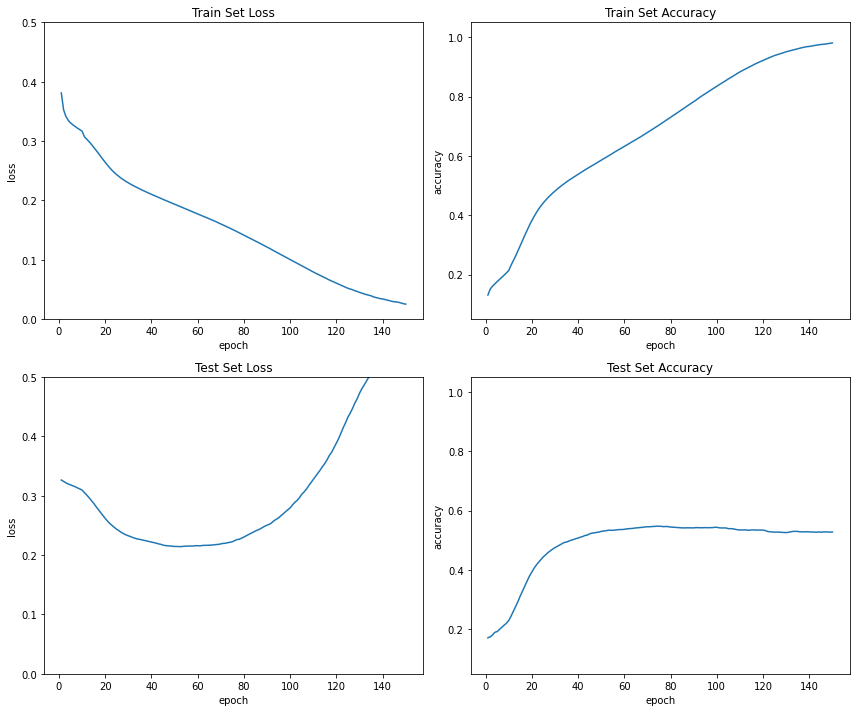

In [22]:
print(f'Elapsed time: {(model_3_3_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_3_history, 'model_3_3')

## Model 4
- batch normalization

In [23]:
def convolution_block_with_batch_normalization(n_filters, activation='relu'):
    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.MaxPooling2D(pool_size=(2, 2))]

model_4 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_batch_normalization(20),
    *convolution_block_with_batch_normalization(40),
    *convolution_block_with_batch_normalization(80),
    *convolution_block_with_batch_normalization(160),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_4')

model_4_history, model_4_elapsed_time = compile_and_fit(model_4)

Epoch 1/150
782/782 [==============================] - 9s 10ms/step - loss: 0.2825 - categorical_accuracy: 0.3770 - val_loss: 0.2426 - val_categorical_accuracy: 0.4665
Epoch 2/150
782/782 [==============================] - 8s 10ms/step - loss: 0.2201 - categorical_accuracy: 0.5174 - val_loss: 0.2184 - val_categorical_accuracy: 0.5240
Epoch 3/150
782/782 [==============================] - 8s 10ms/step - loss: 0.1983 - categorical_accuracy: 0.5761 - val_loss: 0.2013 - val_categorical_accuracy: 0.5659
Epoch 4/150
782/782 [==============================] - 8s 10ms/step - loss: 0.1825 - categorical_accuracy: 0.6200 - val_loss: 0.1951 - val_categorical_accuracy: 0.5831
Epoch 5/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1712 - categorical_accuracy: 0.6501 - val_loss: 0.1878 - val_categorical_accuracy: 0.5943
Epoch 6/150
782/782 [==============================] - 8s 10ms/step - loss: 0.1620 - categorical_accuracy: 0.6737 - val_loss: 0.1861 - val_categorical_accuracy:

782/782 [==============================] - 8s 10ms/step - loss: 0.0172 - categorical_accuracy: 0.9973 - val_loss: 0.2173 - val_categorical_accuracy: 0.6728
Epoch 50/150
782/782 [==============================] - 9s 11ms/step - loss: 0.0167 - categorical_accuracy: 0.9971 - val_loss: 0.2179 - val_categorical_accuracy: 0.6695
Epoch 51/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0154 - categorical_accuracy: 0.9979 - val_loss: 0.2187 - val_categorical_accuracy: 0.6742
Epoch 52/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0146 - categorical_accuracy: 0.9983 - val_loss: 0.2206 - val_categorical_accuracy: 0.6727
Epoch 53/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0141 - categorical_accuracy: 0.9984 - val_loss: 0.2233 - val_categorical_accuracy: 0.6734
Epoch 54/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0133 - categorical_accuracy: 0.9985 - val_loss: 0.2247 - val_categorical_accuracy: 0.6740

782/782 [==============================] - 8s 10ms/step - loss: 0.0034 - categorical_accuracy: 0.9999 - val_loss: 0.2763 - val_categorical_accuracy: 0.6732
Epoch 98/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0034 - categorical_accuracy: 1.0000 - val_loss: 0.2756 - val_categorical_accuracy: 0.6741
Epoch 99/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0033 - categorical_accuracy: 0.9999 - val_loss: 0.2776 - val_categorical_accuracy: 0.6743
Epoch 100/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0032 - categorical_accuracy: 0.9999 - val_loss: 0.2776 - val_categorical_accuracy: 0.6721
Epoch 101/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0032 - categorical_accuracy: 1.0000 - val_loss: 0.2769 - val_categorical_accuracy: 0.6724
Epoch 102/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0031 - categorical_accuracy: 1.0000 - val_loss: 0.2784 - val_categorical_accuracy: 0.6

782/782 [==============================] - 8s 10ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.3035 - val_categorical_accuracy: 0.6745
Epoch 146/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.3011 - val_categorical_accuracy: 0.6751
Epoch 147/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.3027 - val_categorical_accuracy: 0.6744
Epoch 148/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_categorical_accuracy: 0.6753
Epoch 149/150
782/782 [==============================] - 9s 11ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.3043 - val_categorical_accuracy: 0.6731
Epoch 150/150
782/782 [==============================] - 8s 10ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.3046 - val_categorical_accuracy: 0

Elapsed time: 1202.91 s


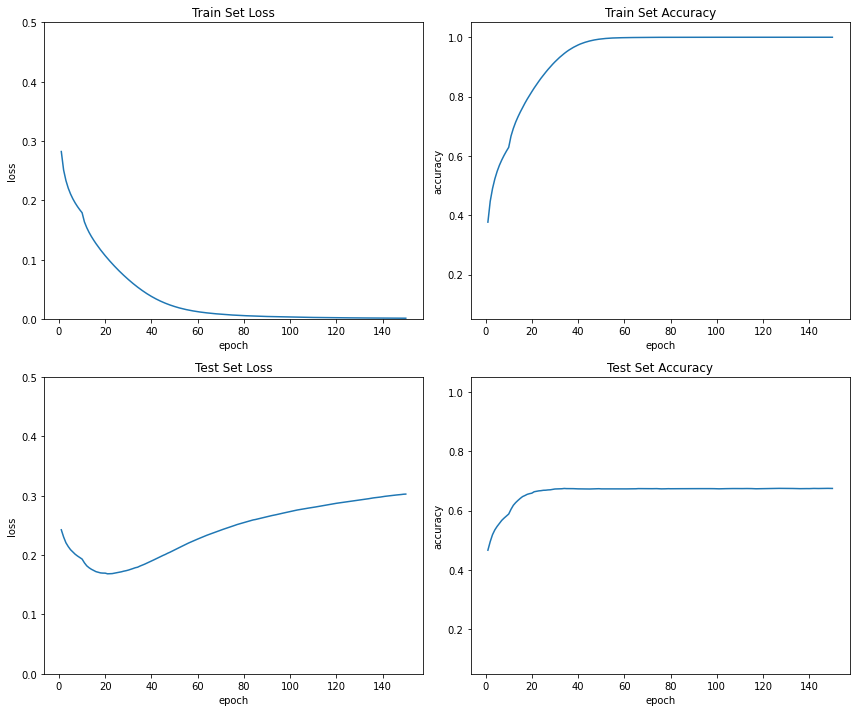

In [24]:
print(f'Elapsed time: {(model_4_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_4_history, 'model_4')

# Model 5

- dropout layer

In [25]:
def convolution_block_with_dropout(n_filters, dropout_rate, activation='relu'):
    return (convolution_block_with_batch_normalization(n_filters, activation) + 
            [tf_layers.Dropout(dropout_rate)])

model_5 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_dropout( 20, 0.1),
    *convolution_block_with_dropout( 40, 0.2),
    *convolution_block_with_dropout( 80, 0.3),
    *convolution_block_with_dropout(160, 0.4),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_5')

model_5_history, model_5_elapsed_time = compile_and_fit(model_5)

Epoch 1/150
782/782 [==============================] - 10s 11ms/step - loss: 0.4034 - categorical_accuracy: 0.2386 - val_loss: 0.2852 - val_categorical_accuracy: 0.3563
Epoch 2/150
782/782 [==============================] - 10s 13ms/step - loss: 0.3167 - categorical_accuracy: 0.3335 - val_loss: 0.2573 - val_categorical_accuracy: 0.4178
Epoch 3/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2840 - categorical_accuracy: 0.3828 - val_loss: 0.2422 - val_categorical_accuracy: 0.4588
Epoch 4/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2665 - categorical_accuracy: 0.4233 - val_loss: 0.2312 - val_categorical_accuracy: 0.4849
Epoch 5/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2539 - categorical_accuracy: 0.4470 - val_loss: 0.2249 - val_categorical_accuracy: 0.5056
Epoch 6/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2437 - categorical_accuracy: 0.4683 - val_loss: 0.2125 - val_categorical_accurac

782/782 [==============================] - 9s 11ms/step - loss: 0.1367 - categorical_accuracy: 0.7182 - val_loss: 0.1331 - val_categorical_accuracy: 0.7187
Epoch 50/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1366 - categorical_accuracy: 0.7201 - val_loss: 0.1329 - val_categorical_accuracy: 0.7187
Epoch 51/150
782/782 [==============================] - 9s 12ms/step - loss: 0.1349 - categorical_accuracy: 0.7231 - val_loss: 0.1302 - val_categorical_accuracy: 0.7317
Epoch 52/150
782/782 [==============================] - 10s 12ms/step - loss: 0.1345 - categorical_accuracy: 0.7235 - val_loss: 0.1322 - val_categorical_accuracy: 0.7259
Epoch 53/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1337 - categorical_accuracy: 0.7241 - val_loss: 0.1266 - val_categorical_accuracy: 0.7385
Epoch 54/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1329 - categorical_accuracy: 0.7296 - val_loss: 0.1350 - val_categorical_accuracy: 0.716

782/782 [==============================] - 9s 11ms/step - loss: 0.1053 - categorical_accuracy: 0.7904 - val_loss: 0.1065 - val_categorical_accuracy: 0.7824
Epoch 98/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1052 - categorical_accuracy: 0.7921 - val_loss: 0.1088 - val_categorical_accuracy: 0.7777
Epoch 99/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1052 - categorical_accuracy: 0.7919 - val_loss: 0.1148 - val_categorical_accuracy: 0.7665
Epoch 100/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1042 - categorical_accuracy: 0.7936 - val_loss: 0.1093 - val_categorical_accuracy: 0.7796
Epoch 101/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1034 - categorical_accuracy: 0.7972 - val_loss: 0.1102 - val_categorical_accuracy: 0.7778
Epoch 102/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1031 - categorical_accuracy: 0.7960 - val_loss: 0.1061 - val_categorical_accuracy: 0.7

782/782 [==============================] - 8s 11ms/step - loss: 0.0883 - categorical_accuracy: 0.8285 - val_loss: 0.0990 - val_categorical_accuracy: 0.8037
Epoch 146/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0875 - categorical_accuracy: 0.8312 - val_loss: 0.0986 - val_categorical_accuracy: 0.8070
Epoch 147/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0875 - categorical_accuracy: 0.8308 - val_loss: 0.1035 - val_categorical_accuracy: 0.7981
Epoch 148/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0873 - categorical_accuracy: 0.8297 - val_loss: 0.0948 - val_categorical_accuracy: 0.8152
Epoch 149/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0865 - categorical_accuracy: 0.8322 - val_loss: 0.0978 - val_categorical_accuracy: 0.8087
Epoch 150/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0866 - categorical_accuracy: 0.8348 - val_loss: 0.0989 - val_categorical_accuracy: 0

Elapsed time: 1297.73 s


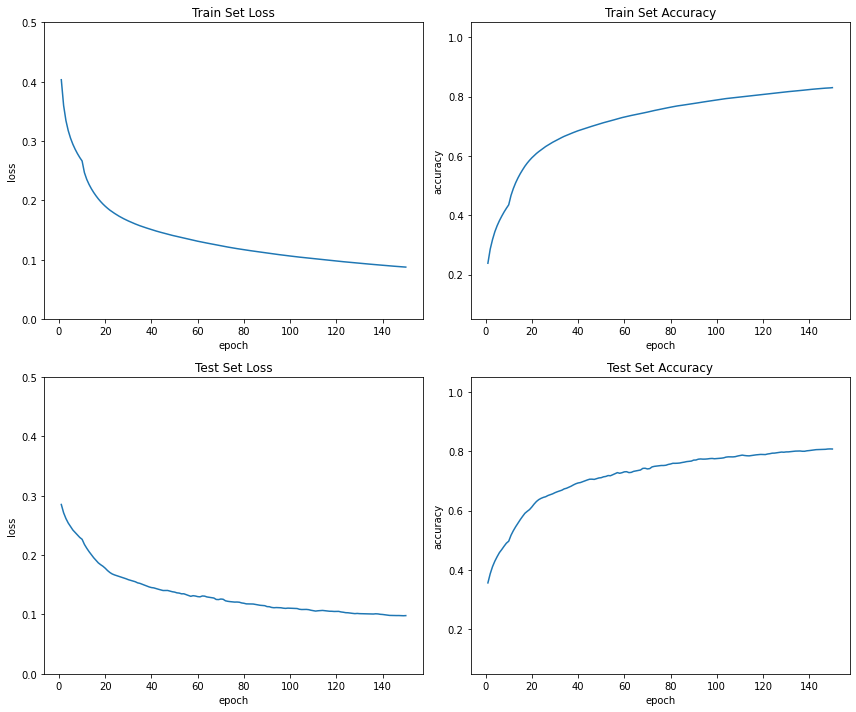

In [26]:
print(f'Elapsed time: {(model_5_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_5_history, 'model_5')

# GAP

## Model 6
- Global Average Pooling (GAP)

In [27]:
def convolution_block_with_opt_gap(n_filters, dropout_rate, gap=False, activation='relu'):
    if gap:
        pool_or_gap_layer = tf_layers.GlobalAveragePooling2D()
    else:
        pool_or_gap_layer = tf_layers.MaxPooling2D(pool_size=(2, 2))

    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            pool_or_gap_layer,
            tf_layers.Dropout(dropout_rate)]

model_6 = tf.keras.Sequential(layers=[
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_opt_gap( 20, 0.1),
    *convolution_block_with_opt_gap( 40, 0.2),
    *convolution_block_with_opt_gap( 80, 0.3),
    *convolution_block_with_opt_gap(160, 0.4, gap=True),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_6')

model_6_history, model_6_elapsed_time = compile_and_fit(model_6)
model_6.save_weights('./saved_weights/model_6_weights')

Epoch 1/150
782/782 [==============================] - 10s 11ms/step - loss: 0.5565 - categorical_accuracy: 0.2207 - val_loss: 0.4210 - val_categorical_accuracy: 0.2701
Epoch 2/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3620 - categorical_accuracy: 0.3117 - val_loss: 0.3095 - val_categorical_accuracy: 0.3425
Epoch 3/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2897 - categorical_accuracy: 0.3706 - val_loss: 0.2845 - val_categorical_accuracy: 0.3245
Epoch 4/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2635 - categorical_accuracy: 0.4093 - val_loss: 0.2556 - val_categorical_accuracy: 0.4193
Epoch 5/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2487 - categorical_accuracy: 0.4423 - val_loss: 0.2431 - val_categorical_accuracy: 0.4528
Epoch 6/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2386 - categorical_accuracy: 0.4675 - val_loss: 0.2452 - val_categorical_accuracy

782/782 [==============================] - 9s 11ms/step - loss: 0.1442 - categorical_accuracy: 0.7052 - val_loss: 0.1463 - val_categorical_accuracy: 0.6904
Epoch 50/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1432 - categorical_accuracy: 0.7071 - val_loss: 0.1405 - val_categorical_accuracy: 0.7059
Epoch 51/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1421 - categorical_accuracy: 0.7073 - val_loss: 0.1354 - val_categorical_accuracy: 0.7163
Epoch 52/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1414 - categorical_accuracy: 0.7121 - val_loss: 0.1348 - val_categorical_accuracy: 0.7190
Epoch 53/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1403 - categorical_accuracy: 0.7116 - val_loss: 0.1383 - val_categorical_accuracy: 0.7114
Epoch 54/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1393 - categorical_accuracy: 0.7149 - val_loss: 0.1327 - val_categorical_accuracy: 0.7251

782/782 [==============================] - 9s 11ms/step - loss: 0.1124 - categorical_accuracy: 0.7774 - val_loss: 0.1113 - val_categorical_accuracy: 0.7766
Epoch 98/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1115 - categorical_accuracy: 0.7791 - val_loss: 0.1104 - val_categorical_accuracy: 0.7787
Epoch 99/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1112 - categorical_accuracy: 0.7802 - val_loss: 0.1100 - val_categorical_accuracy: 0.7783
Epoch 100/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1110 - categorical_accuracy: 0.7801 - val_loss: 0.1078 - val_categorical_accuracy: 0.7826
Epoch 101/150
782/782 [==============================] - 8s 11ms/step - loss: 0.1108 - categorical_accuracy: 0.7815 - val_loss: 0.1105 - val_categorical_accuracy: 0.7797
Epoch 102/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1101 - categorical_accuracy: 0.7837 - val_loss: 0.1081 - val_categorical_accuracy: 0.7

782/782 [==============================] - 8s 11ms/step - loss: 0.0938 - categorical_accuracy: 0.8201 - val_loss: 0.0985 - val_categorical_accuracy: 0.8076
Epoch 146/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0938 - categorical_accuracy: 0.8174 - val_loss: 0.0978 - val_categorical_accuracy: 0.8076
Epoch 147/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0930 - categorical_accuracy: 0.8218 - val_loss: 0.0991 - val_categorical_accuracy: 0.8090
Epoch 148/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0931 - categorical_accuracy: 0.8202 - val_loss: 0.0970 - val_categorical_accuracy: 0.8106
Epoch 149/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0926 - categorical_accuracy: 0.8211 - val_loss: 0.0959 - val_categorical_accuracy: 0.8128
Epoch 150/150
782/782 [==============================] - 8s 11ms/step - loss: 0.0931 - categorical_accuracy: 0.8204 - val_loss: 0.0993 - val_categorical_accuracy: 0

Elapsed time: 1282.72 s


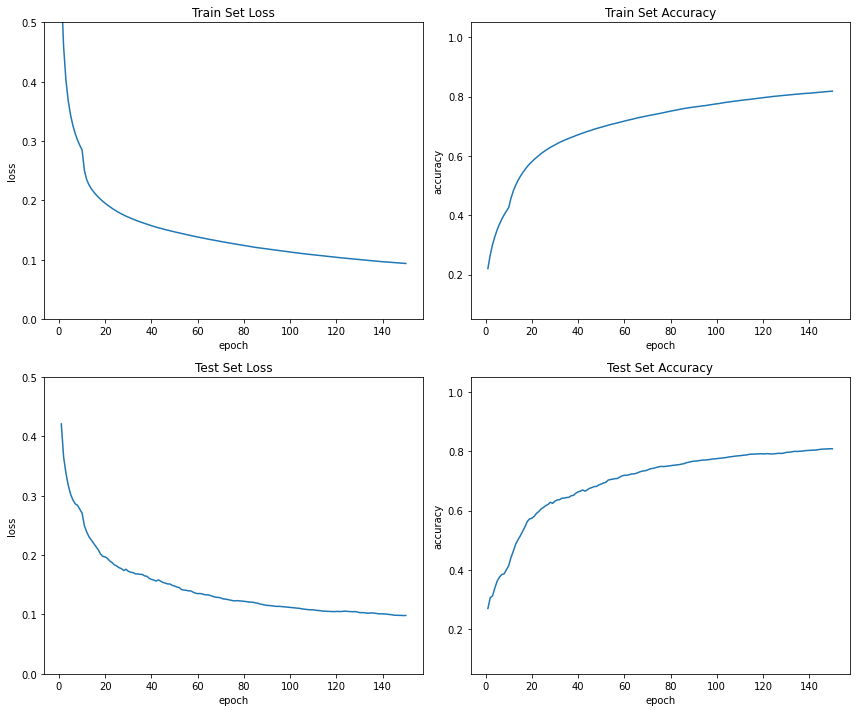

In [28]:
print(f'Elapsed time: {(model_6_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_6_history, 'model_6')

## New image
- Don-vip, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)

128 x 96


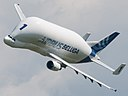

In [29]:
raw_image = Image.open('./Airbus_beluga.jpg')
print(f'{raw_image.width} x {raw_image.height}')
raw_image

In [30]:
resized_image = raw_image.resize((round(raw_image.width / 3), round(raw_image.height / 3)), Image.ANTIALIAS)
resized_image.width, resized_image.height

(43, 32)

In [31]:
image = np.array(resized_image)
print(model_6.predict(np.array([image])))
print('Predicted class:', np.argmax(model_6.predict(np.array([image]))))

[[9.9999392e-01 1.5118273e-06 2.0107689e-06 2.4748630e-07 5.5071172e-07
  3.8532133e-07 4.2686017e-07 5.9277763e-08 6.1370389e-07 2.5338719e-07]]
Predicted class: 0
